# Intoduction to CNN using Keras using Chest X-Rays (Pneumonia)

# Pneumonia Detection

### Problem Statement :
### Create a classifier using Convolutional Neural Networks to classify X-Ray scans from patients with Pneumonia

### About the Data:

- **Objective:**

- Pneumonia Detection Using Chest X-Ray Images
- Distinguish bacterial and viral pneumonia on chest X-rays
- Dignosis of pediatric pneumonia using chest X-ray images.
- Classifying pediatric chest X-rays to detect pneumonia and furthermore to distinguish viral and bacterial pneumonia
- Test in a cohort of pediatric chest radiographs
- The classes are:
  - Normal
  - Bacterial Pneumonia
  - Viral Pneumonia
- Demonstrate model efficacy in analysis of chest X-ray images.

- **Data Description:**

Dataset is a labeled collection of a total of 5,232 chest X-ray images from children, including 3,883 characterized as depicting pneumonia (2,538 bacterial and 1,345 viral) and 1,349 normal, from a total of 5,856 patients to train the AI system. The model is then tested with 234 normal images and 390 pneumonia images (242 bacterial and 148 viral) from 624 patients. 

For the analysis of chest X-ray images, all chest radiographs were initially screened for quality control by removing all low quality or unreadable scans. The diagnoses for the images were then graded by two expert physicians before being cleared for training the AI system. In order to account for any grading errors, the evaluation set was also checked by a third expert.

In order to evaluate our model in the context of clinical experts, a validation set of 1000 images (633 patients), independent of the patients in the training set, was used to compare our network referral decisions with the decisions made by human experts.

- **Context and Citation**
- http://www.cell.com/cell/fulltext/S0092-8674(18)30154-5



### Set up the Environment - Install and load tensorflow and keras

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


### Import required Python and Scikit-learn libraries

In [82]:
#Import tensorflow and check version

import tensorflow as tf
import keras
print('Tensor Flow version : ', tf.__version__)
print('Keras version : ', keras.__version__)
#import OpenCV-Python to read images
import cv2
print('OpenCV-Python version : ', cv2.__version__)
import pandas as pd
import numpy as np
import os
import zipfile

#import matplotlib and seaborn to plot images
import matplotlib.pyplot as plt
%matplotlib inline
from PIL import Image
import seaborn as sns

from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, BatchNormalization, Dropout, Flatten, Dense
from keras import activations, optimizers, callbacks, backend
from keras.preprocessing.image import ImageDataGenerator, load_img

from sklearn.metrics import accuracy_score,f1_score,precision_score,recall_score,confusion_matrix,classification_report

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

Tensor Flow version :  2.3.0
Keras version :  2.4.3
OpenCV-Python version :  4.1.2


### Get the datasets and unzip

In [3]:
!ls -l '/content/sample_data/'

total 55504
-rwxr-xr-x 1 root root     1697 Jan  1  2000 anscombe.json
-rw-r--r-- 1 root root   301141 Jul 30 16:30 california_housing_test.csv
-rw-r--r-- 1 root root  1706430 Jul 30 16:30 california_housing_train.csv
-rw-r--r-- 1 root root 18289443 Jul 30 16:30 mnist_test.csv
-rw-r--r-- 1 root root 36523880 Jul 30 16:30 mnist_train_small.csv
-rwxr-xr-x 1 root root      930 Jan  1  2000 README.md


In [4]:
cp '/content/drive/My Drive/AIML/Chest_X-Ray_Images_Pneumonia_Detection/17810_23812_bundle_archive.zip' '/content/sample_data/'

In [5]:
with zipfile.ZipFile('/content/sample_data/17810_23812_bundle_archive.zip', 'r') as f :
  f.extractall('/content/sample_data/')

In [13]:
!ls -l '/content/sample_data/chest_xray/chest_xray/'

total 12
drwxr-xr-x 4 root root 4096 Aug  5 20:10 test
drwxr-xr-x 4 root root 4096 Aug  5 20:10 train
drwxr-xr-x 4 root root 4096 Aug  5 20:11 val


### Load the datasets

In [63]:
# Labels and Image size
labels=['PNEUMONIA', 'NORMAL']
img_size = 150

In [64]:
# Function to get training data
def get_data(data_dir):
  data=[]
  for label in labels:
    path = os.path.join(data_dir,label)
    class_num = labels.index(label)
    #print(class_num, path)
    # Read each image and append it to data arr along with the class_num
    for img in os.listdir(path):
      try:
        # Read the image
        img_arr = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
        #Resize the image
        resized_img_arr = cv2.resize(img_arr, (img_size, img_size), cv2.INTER_AREA)
        data.append([resized_img_arr, class_num])
      except Exception as e:
        print(e)
  return np.array(data)

In [65]:
# Load train test and validation datasets
train = get_data('/content/sample_data/chest_xray/chest_xray/train')
test = get_data('/content/sample_data/chest_xray/chest_xray/test')
val = get_data('/content/sample_data/chest_xray/chest_xray/val')

OpenCV(4.1.2) /io/opencv/modules/imgproc/src/resize.cpp:3720: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

OpenCV(4.1.2) /io/opencv/modules/imgproc/src/resize.cpp:3720: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

OpenCV(4.1.2) /io/opencv/modules/imgproc/src/resize.cpp:3720: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

OpenCV(4.1.2) /io/opencv/modules/imgproc/src/resize.cpp:3720: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



### Preview train images

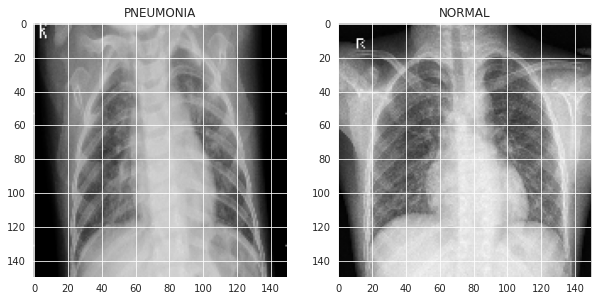

In [66]:
fig = plt.figure(figsize = (10,10))

a1 = fig.add_subplot(1,2,1)
img_plot = plt.imshow(train[0][0], cmap='gray')
a1.set_title(labels[train[0][1]])

a2 = fig.add_subplot(1,2,2)
img_plot = plt.imshow(train[-1][0], cmap='gray')
a2.set_title(labels[train[-1][1]])

plt.show()

### Visualize counts of classes

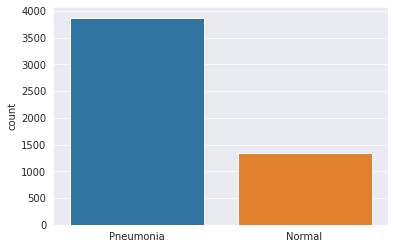

In [67]:
train_labels=[]
for i in train:
  if i[1] == 0:
    train_labels.append('Pneumonia')
  else:
    train_labels.append('Normal')
sns.set_style('darkgrid')
ax = sns.countplot(train_labels)

### Split the data into X - Features and y - Target and perform Grayscale Normalization

In [68]:
# Function to split the dataset
def split_features_target_normalize(data):
  X, y = [], []
  for feature, target in data:
    X.append(feature)
    y.append(target)
  # Normalize X
  X = np.array(X)/255
  y = np.array(y)
  return(X,y)

In [69]:
X_train, y_train = split_features_target_normalize(train)
X_val, y_val = split_features_target_normalize(val)
X_test, y_test = split_features_target_normalize(test)

### Reshape train, val and test feature sets for CNN
Here -1 for input x specifies that this dimension should be dynamically computed based on the number of input values in x, holding the size of all other dimensions constant. This allows us to treat batch_size(parameter with value -1) as a hyperparameter that we can tune

In [70]:
# Reshape into (batch_size, img_size, img_size, channel)
X_train = tf.reshape(X_train,[-1, img_size, img_size, 1])
X_val = tf.reshape(X_val,[-1, img_size, img_size, 1])
X_test = tf.reshape(X_test,[-1, img_size, img_size, 1])

In [71]:
print(X_train.shape, X_val.shape, X_test.shape)
print(y_train.shape, y_val.shape, y_test.shape)

(5216, 150, 150, 1) (16, 150, 150, 1) (624, 150, 150, 1)
(5216,) (16,) (624,)


### Data Augmentation

In [72]:
datagen = ImageDataGenerator(rotation_range=30, 
                             width_shift_range=0.1, 
                             height_shift_range=0.1, 
                             zoom_range=0.2, 
                             horizontal_flip=True)
datagen.fit(X_train)

### Build a CNN Model

In [83]:
#Clear session
backend.clear_session()
#Design and Build the model
model = Sequential()

model.add(Conv2D(32 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu' , input_shape = (150,150,1)))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))

model.add(Conv2D(64 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model.add(Dropout(0.1))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))

model.add(Conv2D(64 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))

model.add(Conv2D(128 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))

model.add(Conv2D(256 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))

model.add(Flatten())
model.add(Dense(units = 128 , activation = 'relu'))
model.add(Dropout(0.2))

model.add(Dense(units = 1 , activation = 'sigmoid'))

In [84]:
# compile model
model.compile(optimizer = "rmsprop" , loss = 'binary_crossentropy' , metrics = ['accuracy'])


In [85]:
# model summary
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 150, 150, 32)      320       
_________________________________________________________________
batch_normalization (BatchNo (None, 150, 150, 32)      128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 75, 75, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 75, 75, 64)        18496     
_________________________________________________________________
dropout (Dropout)            (None, 75, 75, 64)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 75, 75, 64)        256       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 38, 38, 64)        0

In [86]:
# callback for learning rate reduction
learning_rate_reduction = callbacks.ReduceLROnPlateau(monitor='val_accuracy', patience = 2, verbose=1,factor=0.3, min_lr=0.000001)

In [88]:
# Fit the model
history = model.fit(datagen.flow(X_train,y_train, batch_size = 32), 
                    epochs = 12, 
                    validation_data = datagen.flow(X_val, y_val), 
                    callbacks = [learning_rate_reduction])

Epoch 1/12
163/163 [==============================] - 15s 94ms/step - loss: 0.5046 - accuracy: 0.8347 - val_loss: 38.4057 - val_accuracy: 0.5000
Epoch 2/12
163/163 [==============================] - 15s 89ms/step - loss: 0.2874 - accuracy: 0.8972 - val_loss: 43.3359 - val_accuracy: 0.5000
Epoch 3/12
163/163 [==============================] - ETA: 0s - loss: 0.2420 - accuracy: 0.9156
Epoch 00003: ReduceLROnPlateau reducing learning rate to 0.0003000000142492354.
163/163 [==============================] - 14s 89ms/step - loss: 0.2420 - accuracy: 0.9156 - val_loss: 8.1375 - val_accuracy: 0.5000
Epoch 4/12
163/163 [==============================] - 15s 89ms/step - loss: 0.1639 - accuracy: 0.9421 - val_loss: 9.9383 - val_accuracy: 0.5000
Epoch 5/12
163/163 [==============================] - ETA: 0s - loss: 0.1447 - accuracy: 0.9526
Epoch 00005: ReduceLROnPlateau reducing learning rate to 9.000000427477062e-05.
163/163 [==============================] - 15s 89ms/step - loss: 0.1447 - accurac

In [90]:
print("Model Loss is - " , model.evaluate(X_test,y_test)[0])

20/20 [==============================] - 1s 27ms/step - loss: 0.4231 - accuracy: 0.8317
Model Loss is -  0.4230853319168091


In [91]:
print("Model Accuracy is - " , model.evaluate(X_test,y_test)[1]*100 , "%")

20/20 [==============================] - 0s 23ms/step - loss: 0.4231 - accuracy: 0.8317
Model Accuracy is -  83.17307829856873 %


### Plot Accuracy and Loss

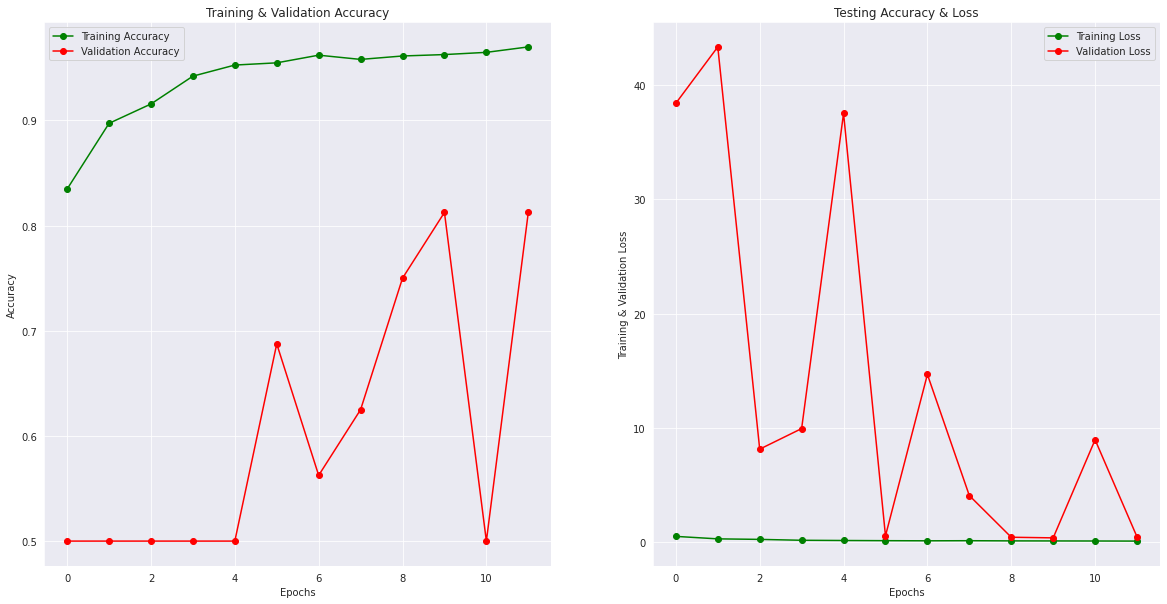

In [92]:
epochs = [i for i in range(12)]
fig , ax = plt.subplots(1,2)
train_acc = history.history['accuracy']
train_loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']
fig.set_size_inches(20,10)

ax[0].plot(epochs , train_acc , 'go-' , label = 'Training Accuracy')
ax[0].plot(epochs , val_acc , 'ro-' , label = 'Validation Accuracy')
ax[0].set_title('Training & Validation Accuracy')
ax[0].legend()
ax[0].set_xlabel("Epochs")
ax[0].set_ylabel("Accuracy")

ax[1].plot(epochs , train_loss , 'g-o' , label = 'Training Loss')
ax[1].plot(epochs , val_loss , 'r-o' , label = 'Validation Loss')
ax[1].set_title('Testing Accuracy & Loss')
ax[1].legend()
ax[1].set_xlabel("Epochs")
ax[1].set_ylabel("Training & Validation Loss")
plt.show()

### Predictions

In [96]:
# Predictions
predictions = (model.predict(X_test) > 0.5).astype("int32")
predictions = predictions.reshape(1,-1)[0]
predictions[:15]

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1], dtype=int32)

In [97]:
# Classification Report
print(classification_report(y_test, predictions, target_names = ['Pneumonia (Class 0)','Normal (Class 1)']))

                     precision    recall  f1-score   support

Pneumonia (Class 0)       0.97      0.76      0.85       390
   Normal (Class 1)       0.70      0.96      0.81       234

           accuracy                           0.83       624
          macro avg       0.83      0.86      0.83       624
       weighted avg       0.87      0.83      0.83       624



In [98]:
# Confusion matrix
cm = confusion_matrix(y_test,predictions)
cm

array([[295,  95],
       [ 10, 224]])